In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
with open('scores.json', 'r') as f:
    scores = json.load(f)
scores.keys(), scores["0.95"].keys()

(dict_keys(['0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '0.95', '0.98', '0.99', '0.91', '0.92', '0.93', '0.94', '0.96', '0.97', '1.0']),
 dict_keys(['gpt2', 'bert', 'gpt2_masks', 'bert_masks', 'asr']))

In [15]:
def plot_scores(error="WER"):
    models = ['gpt2', 'bert', 'gpt2_masks', 'bert_masks', 'asr']
    plt.figure(figsize=(10,5))
    for model in models:
        model_scores = []
        for lmbda in scores.keys():
            model_scores.append([float(lmbda),scores[lmbda][model][error] * 100])
        model_scores = np.array(model_scores)
        model_scores_sorted = model_scores[model_scores[:, 0].argsort()]
        if model == "asr":
            plt.plot(model_scores_sorted[:-1,0], model_scores_sorted[:-1,1], color="k", label=model)
        else:
            plt.plot(model_scores_sorted[:-1,0], model_scores_sorted[:-1,1], marker="o", label=model)
    plt.title(f"{error} vs. $\lambda$")
    plt.legend()
    sns.despine()

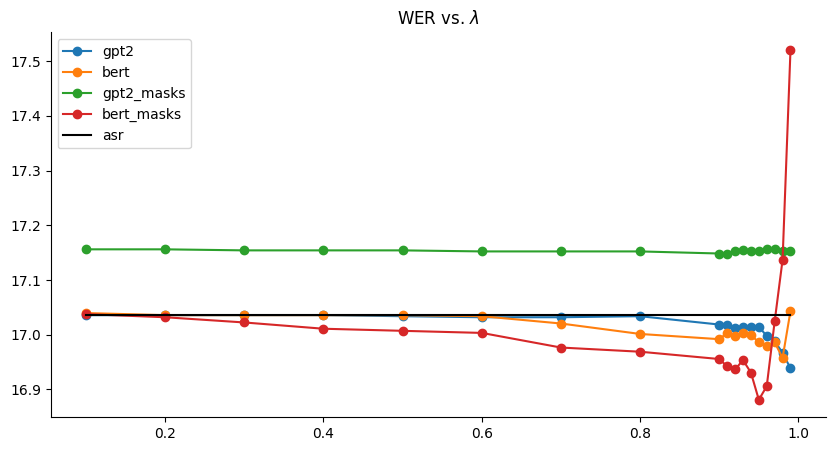

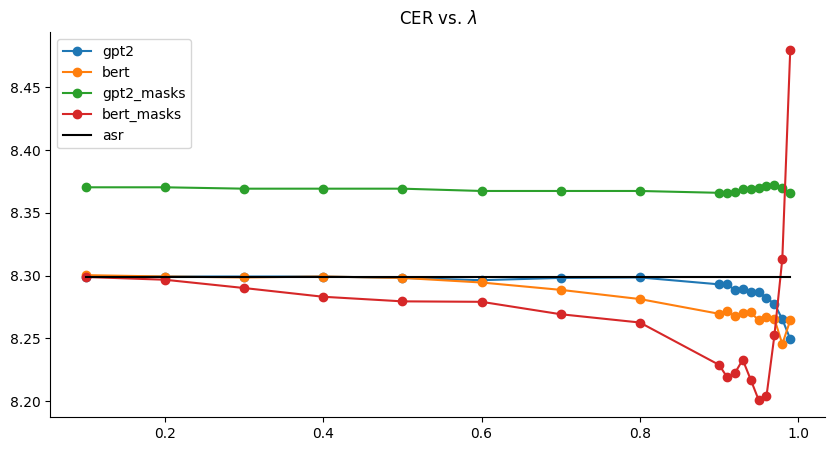

In [16]:
plot_scores("WER")
plot_scores("CER")